<hr>
<p style="text-align:left;">
    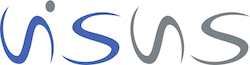
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-11-03
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 03
Responsible tutor: Isha Sharma
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-11-10, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-11-14</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 3.1 (7 points)
Let $f(x,y) = x^6 + y^6 - 3x^2- 3y^2, \mathbb{R}^2\mapsto\mathbb{R}$. Critical points satisfy $\vec{\nabla} f= \vec{0}$. For each critical point $\vec{a}$ its type is given by:

$$
\vec{a} := \left\{
\begin{array}{ll}
\text{local minima,} & \quad \text{if } \frac{\partial^2 f}{\partial x^2}(\vec{a}) > 0 \text{ and } \det H_{f}(\vec{a}) > 0, \\[5pt]
\text{local maxima,} & \quad \text{if } \frac{\partial^2 f}{\partial x^2}(\vec{a}) < 0 \text{ and } \det H_{f}(\vec{a}) > 0, \\[5pt]
\text{saddle point,} & \quad \text{if } \det H_{f}(\vec{a}) < 0, \\
\end{array} \right\},
$$

 where $\vec{\nabla} f$ and $ H_{f}$ are the gradient and the Hesse matrix of the function $f$, respectively.

`(a)` Find the critical points of \( f \) and determine their type.



Given that 

\begin{equation*}
\vec{\nabla} f=
    \begin{pmatrix}
        \frac{\partial f}{\partial x}(x,y) \\
        \frac{\partial f}{\partial y}(x,y)
    \end{pmatrix}=
    \begin{pmatrix}
        6x^5-6x \\
        6y^5-6y
    \end{pmatrix}
\end{equation*}

, and 

\begin{equation*}
H_f=
    \begin{pmatrix}
        \frac{\partial^2 f}{\partial x^2}(x,y) & \frac{\partial^2 f}{\partial y\partial x}(x,y) \\
        \frac{\partial^2 f}{\partial x\partial y}(x,y) & \frac{\partial^2 f}{\partial y^2}(x,y) \\
    \end{pmatrix}=
    \begin{pmatrix}
        30x^4-6 & 0 \\
        0 & 30y^4-6
    \end{pmatrix}.
\end{equation*}

$\det H_f$ is given by $(30x^4-6)(30y^4-6)$.

If $\vec{\nabla f}=\vec{0}$, we have

\begin{equation*}
    \begin{cases}
        6x^5-6x = 0 \\
        6y^5-6y = 0
    \end{cases}\Rightarrow
    \begin{cases}
        x = 0, \pm 1 \\
        y = 0, \pm 1
    \end{cases}.
\end{equation*}

Thus, the saddle points are $(0,0),(0,1),(0,-1),(1,0),(1,1),(1,-1),(-1,0),(-1,1),(-1,-1)$.

Also, $\frac{\partial^2 f}{\partial x^2}=30x^4-6$.

Combining all the conditions above, we have then

\begin{equation*}
    \begin{cases}
        \text{local minima: } (1,1),(1,-1),(-1,1),(-1,-1) \\
        \text{local maxima: } (0,0) \\
        \text{saddle point: } (0,1),(0,-1),(1,0),(-1,0) \\
    \end{cases}.
\end{equation*}


`(b)` Check your results with Python and provide a plot of the given function that shows both the surface and the contour in a reasonable manner.  
   


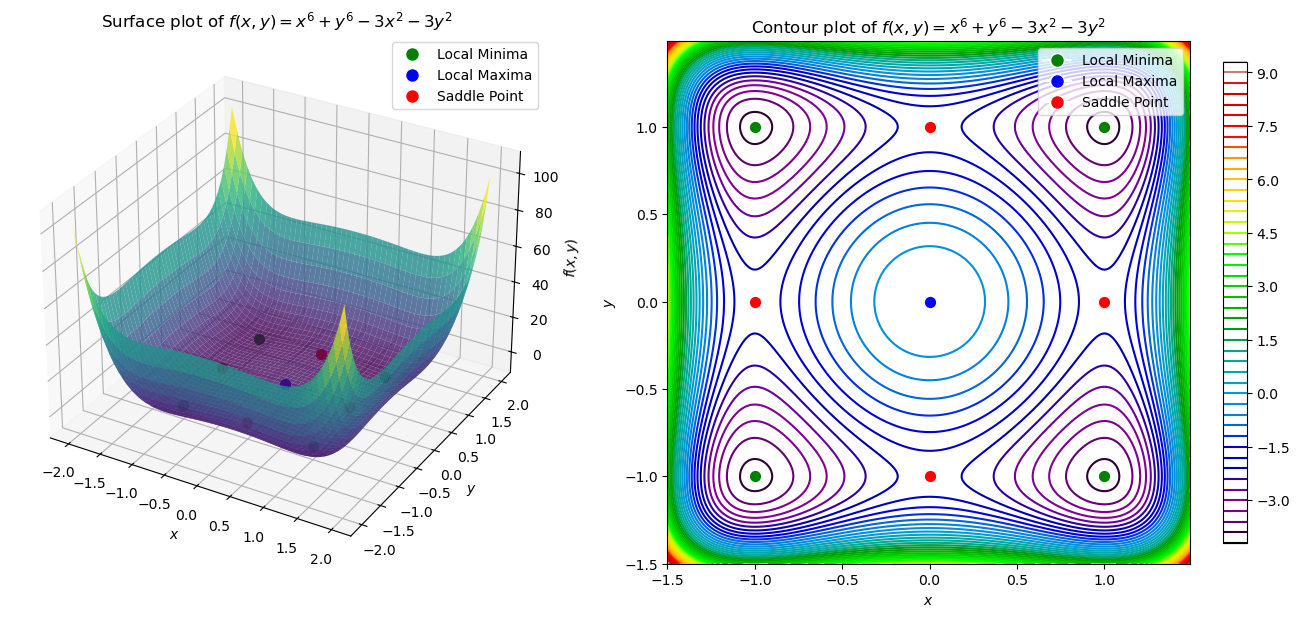

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Define the function f(x, y) = x^6 + y^6 - 3x^2 - 3y^2
def f(x, y):
    return np.power(x, 6) + np.power(y, 6) - 3 * np.power(x, 2) - 3 * np.power(y, 2)

# Define the local minima, local maxima, and saddle points
local_minima = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
local_maxima = [(0, 0)]
saddle_points = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Define the legend elements
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Local Minima'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Local Maxima'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Saddle Point')
]

# Make data
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Create a figure
fig = plt.figure(figsize=(14, 6))

# Plot the surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('Surface plot of $f(x,y) = x^6 + y^6 - 3x^2 - 3y^2$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$f(x,y)$')
ax1.legend(handles=legend_elements)

# Add critical points to the 3D plot
for x_val, y_val in local_minima:
    ax1.scatter(x_val, y_val, f(x_val, y_val), color='green', s=50, label='Local Minima')
for x_val, y_val in local_maxima:
    ax1.scatter(x_val, y_val, f(x_val, y_val), color='blue', s=50, label='Local Maxima')
for x_val, y_val in saddle_points:
    ax1.scatter(x_val, y_val, f(x_val, y_val), color='red', s=50, label='Saddle Point')

X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Plot the contour
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=50, cmap='nipy_spectral')
ax2.set_title('Contour plot of $f(x,y) = x^6 + y^6 - 3x^2 - 3y^2$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_aspect('equal', 'box')
ax2.legend(handles=legend_elements)
fig.colorbar(contour, ax=ax2, orientation='vertical', shrink=0.9)

# Add critical points to the 2D contour plot
for x_val, y_val in local_minima:
    ax2.scatter(x_val, y_val, color='green', s=50, label='Local Minima')
for x_val, y_val in local_maxima:
    ax2.scatter(x_val, y_val, color='blue', s=50, label='Local Maxima')
for x_val, y_val in saddle_points:
    ax2.scatter(x_val, y_val, color='red', s=50, label='Saddle Point')

plt.tight_layout()
plt.show()


`(c)` Multiple choice questions: only one answer is correct. Please use a cross to mark the correct answer.

   A justification for the choice is mandatory. Provide a justification in the space under numbered according to the question.

   1. **The Hessian matrix of an arbitrary function** $g: \mathbb{R}^2 \rightarrow \mathbb{R}$ **is...**

      - [ ] always symmetric.
      - [ ] symmetric, if $g \in \mathcal{C}^1$ \.
      - [x] symmetric, if $g \in \mathcal{C}^2$ \.
      - [ ] never symmetric.
     
      **Justification:** 

   2. **For a function** $g: \mathbb{R}^2 \rightarrow \mathbb{R}$ \, **it holds: the closer different contour lines are, the...**

      - [ ] steeper/larger the gradients are.
      - [ ] flatter/smaller the gradients are.
      - [ ] ... the gradient does not care about contour lines!
      - [ ] ... it is not possible to provide a clear answer!

   3. **Contour lines of a continuous function** $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ **for different isovalues**, i.e., $N_{c_1}$ and $N_{c_2}$ with $c_1 \neq c_2$ , **...**

      - [ ] never cross.
      - [ ] can only cross once.
      - [ ] can cross multiple times (but not infinitely).
      - [ ] can cross infinitely.

   4. **Which of the vectors (orange arrows) in the figure below (blue curves are contour lines) could possibly be a gradient?**

      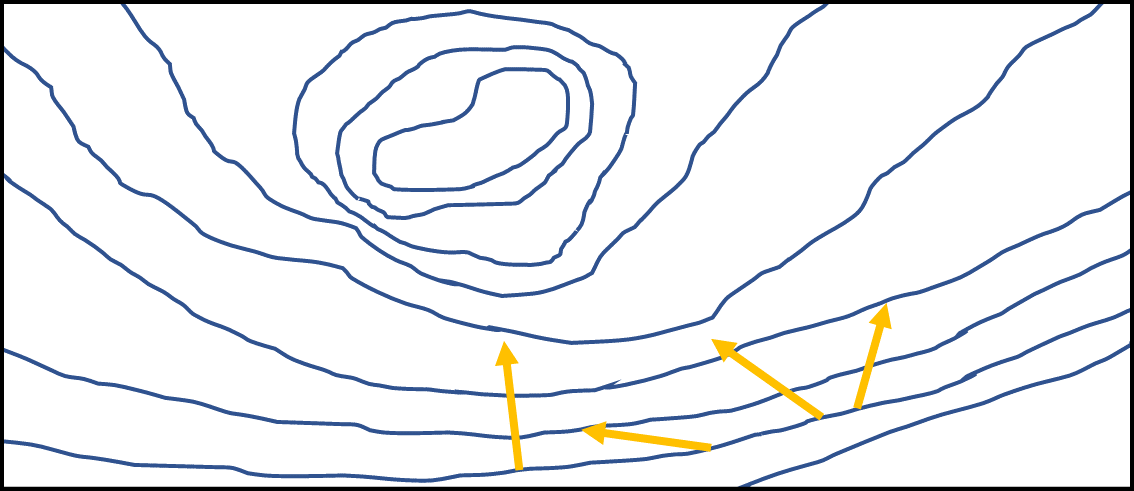


      - [ ] all of them.
      - [ ] none of them.
      - [ ] only the most right one.
      - [ ] only the most left one.





<hr>

### Exercise 3.2 (3 points)


A vector field $\vec{f}(x,y,z)$ with $\mathbf{curl} \vec{f}(x,y,z) = \vec{0}$ everywhere is called *irrotational*.
In this case, a function $\psi(x,y,z)$ can be found, such that $\vec{f} = (\partial_x \psi, \partial_y \psi, \partial_z \psi)^{T}$. 

Let $\vec{f}(x,y,z) = (2x\cos y, -x^2\sin y, 2z)^{T}$.

`(a)` Verify that $\mathbf{curl} \vec{f} = \vec{0}$ everywhere.


<font color='green'>Cell left blank for student response</font>


`(b)` Find a function $\psi(x,y,z)$ such that $\vec{f} = (\partial_x \psi, \partial_y \psi, \partial_z \psi)^{T}$.


<font color='green'>Cell left blank for student response</font>

<hr>

### Exercise 3.3 (4 points)

Given the exponential function $f: \mathbb{R} \rightarrow \mathbb{R}, f(x) = e^x$.

`(a)` Compute the **complete** Taylor expansion around the point $a = 0$.

<font color='green'>Cell left blank for student response</font>



`(b)` Verify with an animated plot that the Taylor expansion approximates the original function $f$ on the entire domain $\mathbb{R}$. It is sufficient to provide the animated plot on the interval $[-5,5]$.


In [2]:
# YOUR CODE HERE

`(c)` Find a function $g\colon D \subseteq \mathbb{R} \rightarrow \mathbb{R}$, where the Taylor expansion does *not* approximate the original function $g$ on the entire domain $D$.

<font color='green'>Cell left blank for student response</font>



<hr>

### Exercise 3.4 (6 points)

Given the function $f\colon \mathbb{R}^2 \to \mathbb{R},  f(x,y) = x^2 y^2$. 

`(a)` Compute the **complete** Taylor expansion around the point $a=(1,0.5)$.

<font color='green'>Cell left blank for student response</font>



`(b)` Using the results from `(a)`, plot the first/second/third/... order Taylor expansions around $a$  in comparison to the function $f$ in Python.

In [3]:
# YOUR CODE HERE

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>